In [3]:
import os
os.chdir('../..')
import numpy as np
from rdkit.Chem import MolFromSmarts

FATTY_ACID_PATT = MolFromSmarts("C-C-C-C(-[OH])=O")


def is_fatty_acid(mol):
    if mol.HasSubstructMatch(FATTY_ACID_PATT):
        atom_types = [a.GetSymbol() for a in mol.GetAtoms()]
        uq, counts = np.unique(atom_types, return_counts=True)
        if ["C", "O"] == uq.tolist() and counts[1] == 2:
            return True
        return False

In [4]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.inchi import MolFromInchi

import pickle
from molexplain.utils import DATA_PATH
    

In [5]:
with open(os.path.join(DATA_PATH, "ppb", "data_ppb.pt"), "rb") as handle:
    inchis, values = pickle.load(handle)

from tqdm import tqdm

fatty_acids = []
idxs = []
for idx, inchi in enumerate(tqdm(inchis)):
    if is_fatty_acid(MolFromInchi(inchi)):
        fatty_acids.append(inchi)
        idxs.append(idx)

vals = [values[idx] for idx in idxs]

 34%|███▍      | 1567/4634 [00:00<00:01, 2254.33it/s]RDKit WARNING: [18:20:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:20:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:20:06] WARNING: not removing hydrogen atom without neighbors
 39%|███▉      | 1830/4634 [00:00<00:01, 2354.56it/s]RDKit WARNING: [18:20:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:20:06] WARNING: not removing hydrogen atom without neighbors
 44%|████▍     | 2055/4634 [00:00<00:01, 2178.26it/s]RDKit WARNING: [18:20:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:20:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:20:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:20:06] WARNING: not removing hydrogen atom without neighbors
 49%|████▉     | 2268/4634 [00:01<00:01, 2075.34it/s]RDKit WARNING: [18:20:06] WARNING: not removing hydrogen atom withou

In [12]:
from molexplain.vis import molecule_importance
from molexplain.utils import MODELS_PATH
from molexplain.train import DEVICE

In [16]:
import torch
model_pt = os.path.join(MODELS_PATH, 'ppb_noHs.pt')

from molexplain.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=49,
                      edge_in_feats=10,
                      global_feats=4,
                      n_tasks=1).to(DEVICE) 
model.load_state_dict(torch.load(model_pt,
                                 map_location=DEVICE))

<All keys matched successfully>

In [9]:
?molecule_importance

In [33]:
mol = MolFromInchi(fatty_acids[0])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=0.1,
                                                      addHs=False)

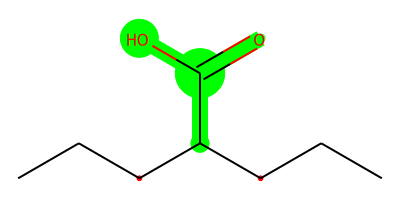

In [34]:
img

In [43]:
mol = MolFromInchi('InChI=1S/C15H16O2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15(16)17/h2-14H,1H2,(H,16,17)/b4-3+,6-5+,8-7+,10-9+,12-11+,14-13+')
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=2,
                                                      eps=1e-4,
                                                      addHs=False)

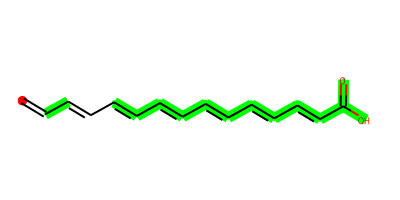

In [44]:
img

In [49]:
mol = MolFromInchi('InChI=1S/C22H32O2.C20H30O2.C18H30O2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22(23)24;1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20(21)22;1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18(19)20/h3-4,6-7,9-10,12-13,15-16,18-19H,2,5,8,11,14,17,20-21H2,1H3,(H,23,24);3-4,6-7,9-10,12-13,15-16H,2,5,8,11,14,17-19H2,1H3,(H,21,22);3-4,6-7,9-10H,2,5,8,11-17H2,1H3,(H,19,20)/b4-3-,7-6-,10-9-,13-12-,16-15-,19-18-;4-3-,7-6-,10-9-,13-12-,16-15-;4-3-,7-6-,10-9-')
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=2,
                                                      eps=1e-4,
                                                      addHs=False,
                                                      img_width=800,
                                                      img_height=2048)

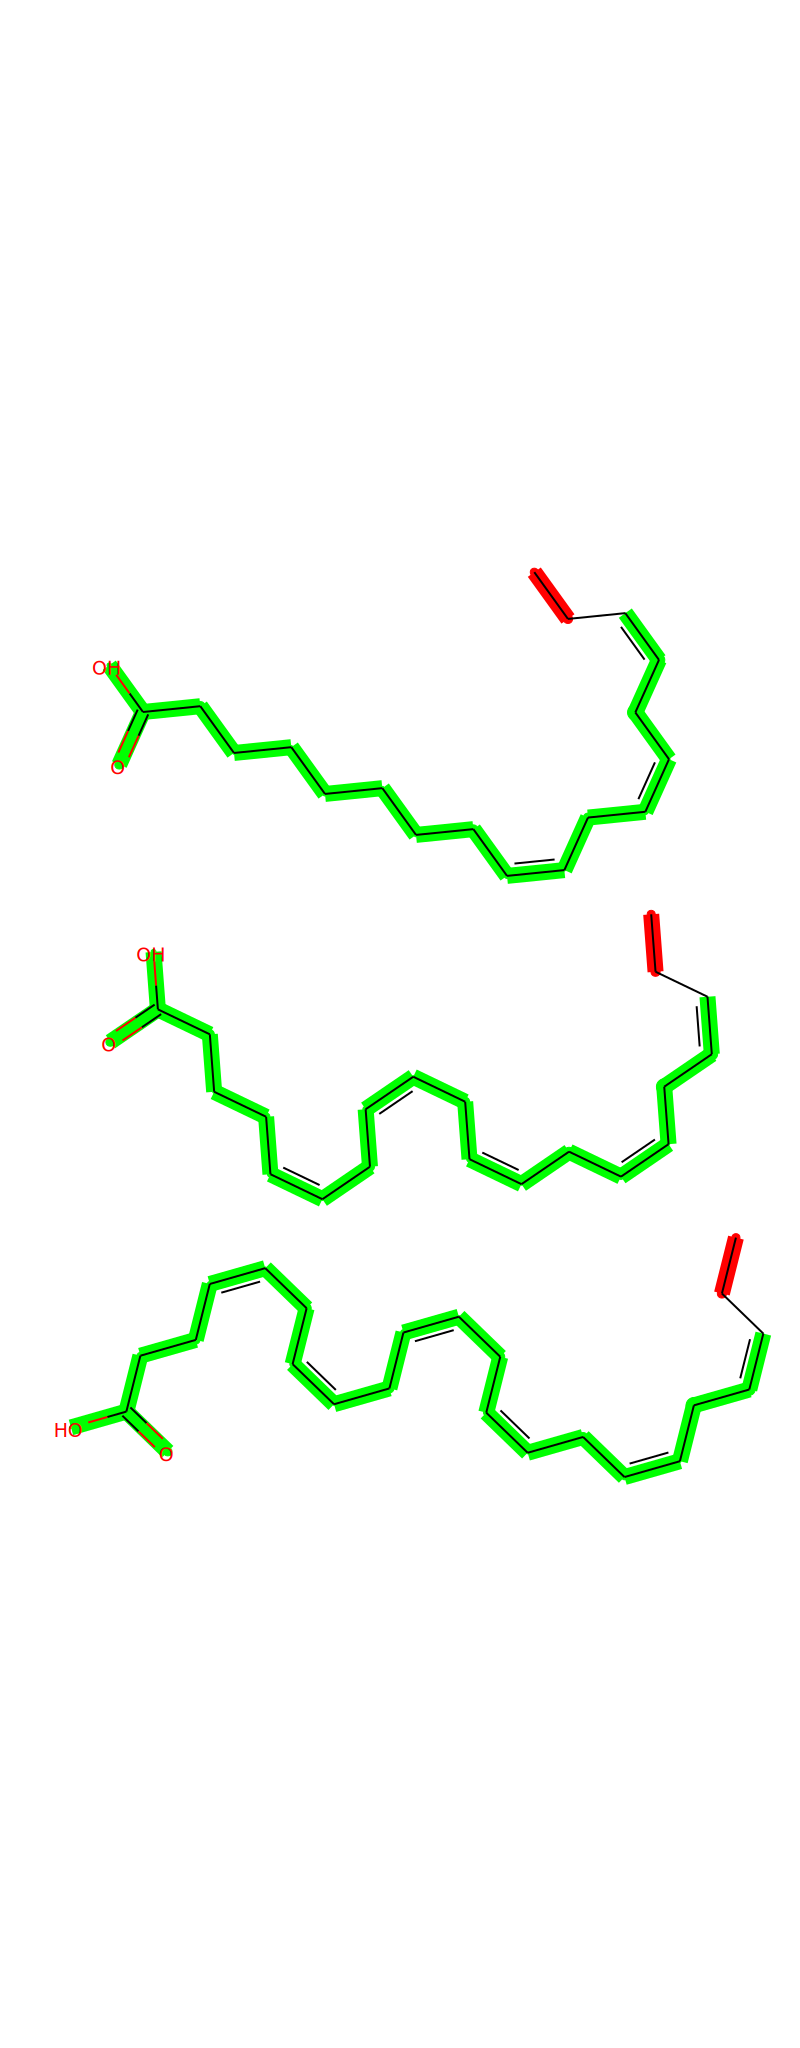

In [50]:
img

In [86]:
mol, val = MolFromInchi(inchis[2400]), values[2400] 
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
print(val)

83.0


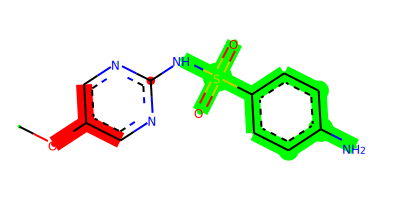

In [87]:
img

In [77]:
vales

NameError: name 'vales' is not defined

In [78]:
values

[1.9166660000000018,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 6.25,
 0.25,
 1.2499990000000014,
 0.25,
 0.16666666666666666,
 0.25,
 0.25,
 6.25,
 0.25,
 0.16666666666666666,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.9999994999999979,
 1.9999990000000014,
 1.9999990000000014,
 1.499999499999998,
 1.4999996666666657,
 1.499999499999998,
 1.499999499999998,
 1.9999990000000014,
 2.9999984999999993,
 2.9999984999999993,
 1.3333329999999985,
 1.6249992499999997,
 2.9999984999999993,
 1.999999499999998,
 2.9999984999999993,
 2.9999990000000003,
 2.9999984999999993,
 5.999998999999999,
 4.000001000000001,
 3.1666660000000024,
 4.000001000000001,
 4.000001000000001,
 2.9999990000000016,
 19.333333666666665,
 3.4999990000000016,
 3.4999990000000016,
 3.4999990000000016,
 5.000000499999999,
 6.0,
 5.000000499999999,
 5.000000499999999,
 5.000000499999999,
 5.000000499999999,
 7.499998500000002,
 6.000000000000003,
 6.9999995,
 7.999999666666667,
 6.9999995,
 6.9